In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import src.data_handler as data_handler
import src.models as models
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

CANTIDAD_DE_CLASES = 48

X_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/X_images.npy")
y_images : np.ndarray[float] = np.load(f"{project_root}/TP03/data/y_images.npy")

np.random.seed(42)

In [2]:
def get_image_by_index(index : int, dataset : np.ndarray[float]) -> np.ndarray[float]:
    return dataset[index].reshape(28 ,28)

## 1 ) Análisis y preprocesamiento de datos

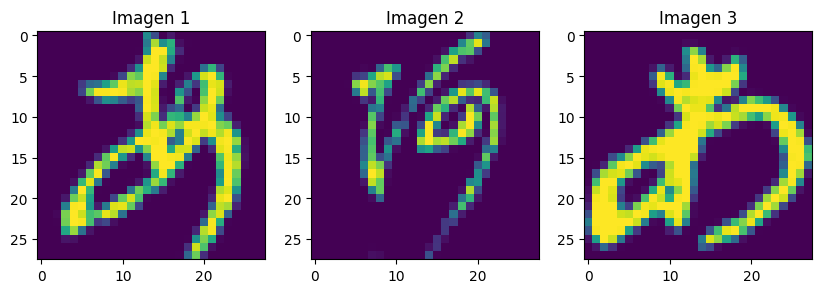

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Imagen 1")
plt.imshow(get_image_by_index(1, X_images), aspect='equal')
plt.subplot(1, 3, 2)
plt.title("Imagen 2")
plt.imshow(get_image_by_index(2, X_images), aspect='equal')
plt.subplot(1, 3, 3)
plt.title("Imagen 3")
plt.imshow(get_image_by_index(3, X_images), aspect='equal')
plt.show()

In [4]:
# Qué es y?

print("\'y_images\'")
print("")
print("Valores del dataset original : ", y_images)
print("Cantidad de valores únicos   : ", len(set(y_images)))
print("")
# Valores que abarcan de 0 al 48, representando cada una de las clases.

# Queremos una representación de 'y' con un esquema de one-hot-encoding
# Cada fila es una muestra, cada muestra es de una clase
y_images = np.array([[0 if y_images[x] != i else 1 for i in range(CANTIDAD_DE_CLASES)] for x in range(len(X_images))], dtype=float)
print("ONE-HOT")
print(y_images)


'y_images'

Valores del dataset original :  [ 0  0  0 ... 25 18 28]
Cantidad de valores únicos   :  49

ONE-HOT
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
X_images = X_images / 255
X_train : pd.DataFrame
X_validation : pd.DataFrame
X_test : pd.DataFrame
X_train, X_validation, X_test, Y_train, Y_validation, Y_test = data_handler.get_splitted_dataset(pd.DataFrame(X_images), pd.DataFrame(y_images))
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_validation.shape)
print(Y_test.shape)

(4000, 784)
(750, 784)
(250, 784)
(4000, 48)
(750, 48)
(250, 48)


## 2 ) Implementación y Entrenamiento de una Red Neuronal Básica

In [6]:
M0 : models.RedNeuronal = models.RedNeuronal([100,80], ['relu', 'relu', 'softmax'])
# print(X_images.shape)
M0.batch_gradient_descent(np.array(X_train), np.array(Y_train), epochs=250, learning_rate=(0.0001, 0.0001), print_results_rate=50)

ValueError: operands could not be broadcast together with shapes (4000,48) (4000,100) 

In [ ]:
print(M0.pred.shape)
print("Accuracy Train = ", M0.get_train_accuracy(Y_train))
print("Accuracy Validation = ", M0.get_accuracy(Y_validation, pred=M0.get_prediction(X_validation)))
print("Accuracy Test = ", M0.get_accuracy(Y_test, pred=M0.get_prediction(X_test)))

(4000, 48)
Accuracy Train =  0.806
Accuracy Validation =  0.5906666666666667
Accuracy Test =  0.572


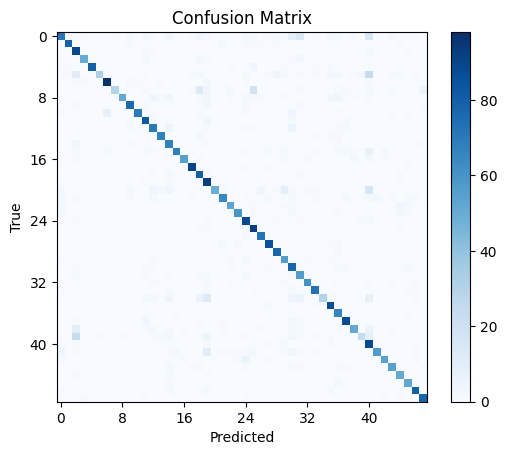

In [ ]:
cm : np.ndarray = M0.get_train_confusion_matrix(Y_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(range(0, cm.shape[0], 8))
plt.yticks(range(0, cm.shape[0], 8))
plt.show()